In [101]:
import pandas as pd

df=pd.read_excel("text2.xlsx")
df

,Month,NYD,DPD30,DPD60,DPD90,DPD120,DPD150,Loss
0,Jan,1000,500,400,300,200,100,50
1,Feb,1200,400,350,250,150,180,30
2,Mar,900,890,250,200,180,120,100
3,Apr,2100,600,650,190,125,150,80
4,May,1800,1200,400,450,125,80,90
5,June,1500,900,800,257,325,90,75


In [102]:
#TAKING OUT ALL THE COLUMNS WITH HAVING INT TYPE
cols=df.select_dtypes(exclude=['object']).columns
cols=cols.to_list()


#CREATING ANOTHER LIST WITH _tmp ADDED TO THE LIST ELEMNETS
cols2=[x + '_tmp' for x in cols]

cols2=cols2+['tmp']

cols=cols+['tmp']
print(cols2)

#ADDING TMP COLUMN TO DF
df['tmp']=0

df['Month']=df['Month'].shift(-1)

#RUNNING OUT THE LOOP FOR EVERY EELEMENT STARTING FROM THE DPD30 (ELEMENT 2nd of cols)
for i in range(len(cols)-1):
    df[cols[i]]=((df[cols[i+1]].shift(-1))/df[cols[i]])*100
    
print(df.head())

['NYD_tmp', 'DPD30_tmp', 'DPD60_tmp', 'DPD90_tmp', 'DPD120_tmp', 'DPD150_tmp', 'Loss_tmp', 'tmp']
  Month        NYD      DPD30      DPD60      DPD90     DPD120     DPD150  \
0   Feb  40.000000  70.000000  62.500000  50.000000  90.000000  30.000000   
1   Mar  74.166667  62.500000  57.142857  72.000000  80.000000  55.555556   
2   Apr  66.666667  73.033708  76.000000  62.500000  83.333333  66.666667   
3   May  57.142857  66.666667  69.230769  65.789474  64.000000  60.000000   
4  June  50.000000  66.666667  64.250000  72.222222  72.000000  93.750000   

   Loss  tmp  
0   0.0    0  
1   0.0    0  
2   0.0    0  
3   0.0    0  
4   0.0    0  


In [103]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [104]:
# displaying the DataFrame
display(df)

,Month,NYD,DPD30,DPD60,DPD90,DPD120,DPD150,Loss,tmp
0,Feb,40.000000,70.000000,62.500000,50.000000,90.000000,30.000000,0.0,0
1,Mar,74.166667,62.500000,57.142857,72.000000,80.000000,55.555556,0.0,0
2,Apr,66.666667,73.033708,76.000000,62.500000,83.333333,66.666667,0.0,0
3,May,57.142857,66.666667,69.230769,65.789474,64.000000,60.000000,0.0,0
4,June,50.000000,66.666667,64.250000,72.222222,72.000000,93.750000,0.0,0
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


The first row: 40= 400/1000, 70=350/500, 62.5=250/400,...

You can see from the above example, I have created a flow rate matrix from the ageing table. for example, 40% in Feb is calculated by dividing 400 in DPD30 divided by 1000 in NYD Jan (400/1000) (i.e 400 out 1000 moved into next bucket in the following month).

We are calculating how much outstanding amount flows into the next bucket. for example, we have 1,000 outstanding in Jan under NYD (not yet due) when it flows into Feb under DPD 30 remaining outstanding is 400 which means 40% of outstanding in jan remain outstanding in feb. Let me know if it's clear otherwise i will add cell references to reproduce exatc excel formula

In [105]:
df.style

,Month,NYD,DPD30,DPD60,DPD90,DPD120,DPD150,Loss,tmp
0,Feb,40.000000,70.000000,62.500000,50.000000,90.000000,30.000000,0.000000,0
1,Mar,74.166667,62.500000,57.142857,72.000000,80.000000,55.555556,0.000000,0
2,Apr,66.666667,73.033708,76.000000,62.500000,83.333333,66.666667,0.000000,0
3,May,57.142857,66.666667,69.230769,65.789474,64.000000,60.000000,0.000000,0
4,June,50.000000,66.666667,64.250000,72.222222,72.000000,93.750000,0.000000,0
5,None,nan,nan,nan,nan,nan,nan,nan,0


## Vintage analysis 
thời điểm lấy data vào cuối tháng 7/2018

In [106]:
import pandas as pd

df=pd.read_excel("quote.xlsx")

In [107]:
df

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
0,10149342,27050,36,0.1099,885.46,B,2013-12-01T00:00,debt_consolidation,0.0,27050.0,4702.53,0.00,0.0,2016-07-01T00:00,2016-08-01T00:00,0,COMPLETED,Lending Club
1,10149488,4800,36,0.1099,157.13,B,2013-12-01T00:00,home_improvement,0.0,4800.0,357.52,0.00,0.0,2014-09-01T00:00,2014-10-01T00:00,0,COMPLETED,Lending Club
2,10148122,12000,36,0.0762,373.94,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1397.54,0.00,0.0,2016-06-01T00:00,2016-07-01T00:00,0,COMPLETED,Lending Club
3,10119623,12000,36,0.1199,398.52,B,2013-12-01T00:00,debt_consolidation,0.0,12000.0,2346.48,0.00,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club
4,10159498,12000,36,0.0662,368.45,A,2013-12-01T00:00,debt_consolidation,0.0,12000.0,1263.95,0.00,0.0,2017-01-01T00:00,2017-02-01T00:00,0,COMPLETED,Lending Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,9185323,5000,36,0.0790,156.46,A,2013-12-01T00:00,credit_card,0.0,5000.0,401.66,0.00,0.0,2015-02-01T00:00,2015-03-01T00:00,0,COMPLETED,Lending Club
12996,9185362,19750,36,0.1430,677.89,C,2013-12-01T00:00,credit_card,0.0,19750.0,4654.02,0.00,0.0,2016-12-01T00:00,2017-01-01T00:00,0,COMPLETED,Lending Club
12997,9028307,11200,36,0.0603,340.88,A,2013-12-01T00:00,debt_consolidation,0.0,11200.0,1063.96,0.00,0.0,2016-09-01T00:00,2016-10-01T00:00,0,COMPLETED,Lending Club
12998,9205287,24000,36,0.1199,797.03,B,2013-12-01T00:00,debt_consolidation,0.0,24000.0,4748.72,0.00,0.0,2016-12-01T00:00,2017-01-01T00:00,0,COMPLETED,Lending Club


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_number                  13000 non-null  int64  
 1   amount_borrowed              13000 non-null  int64  
 2   term                         13000 non-null  int64  
 3   borrower_rate                13000 non-null  float64
 4   installment                  13000 non-null  float64
 5   grade                        13000 non-null  object 
 6   origination_date             13000 non-null  object 
 7   listing_title                13000 non-null  object 
 8   principal_balance            13000 non-null  float64
 9   principal_paid               13000 non-null  float64
 10  interest_paid                13000 non-null  float64
 11  late_fees_paid               13000 non-null  float64
 12  debt_sale_proceeds_received  13000 non-null  float64
 13  last_payment_dat

In [109]:
df['origination_date'] = pd.to_datetime(df['origination_date'])
df['next_payment_due_date'] = pd.to_datetime(df['next_payment_due_date'])
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])

In [110]:
df['loan_status_description'].value_counts()

loan_status_description
COMPLETED    10322
CHARGEOFF     1972
CURRENT        706
Name: count, dtype: int64

In [111]:
#filter CHARGEOFF, don't put CURRENT in b/c too many values 
loan_data = df.loc[df['loan_status_description'].isin(['CHARGEOFF'])]
loan_data

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source
17,10149526,27600,60,0.1997,730.78,D,2013-12-01,debt_consolidation,0.0,14738.17,13762.25,0.0,1802.67,2017-04-01,2017-05-01,486,CHARGEOFF,Lending Club
18,10149566,8000,36,0.1099,261.88,B,2013-12-01,debt_consolidation,0.0,3854.81,1120.22,15.0,632.47,2015-10-01,2015-11-01,1033,CHARGEOFF,Lending Club
26,8617375,10000,60,0.1398,232.58,C,2013-12-01,debt_consolidation,0.0,1619.02,1404.23,0.0,1045.05,2015-02-01,2015-03-01,1278,CHARGEOFF,Lending Club
37,10099585,18450,36,0.1398,630.40,C,2013-12-01,debt_consolidation,0.0,13093.00,3927.30,0.0,531.19,2016-04-01,2016-05-01,851,CHARGEOFF,Lending Club
50,10079565,14825,36,0.1825,537.83,D,2013-12-01,small_business,0.0,8518.78,3898.12,0.0,942.59,2016-01-01,2016-02-01,941,CHARGEOFF,Lending Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9036286,10975,60,0.1855,281.99,D,2013-12-01,debt_consolidation,0.0,342.14,503.59,0.0,1511.49,2014-03-01,2014-04-01,1612,CHARGEOFF,Lending Club
12979,8945258,14400,60,0.1710,358.66,C,2013-12-01,home_improvement,0.0,2545.64,2832.68,0.0,1.58,2015-03-01,2015-04-01,1247,CHARGEOFF,Lending Club
12985,9235313,35000,60,0.2240,974.64,E,2013-12-01,debt_consolidation,0.0,7246.43,11268.53,0.0,5140.88,2015-07-01,2015-08-01,1125,CHARGEOFF,Lending Club
12989,9225334,18800,36,0.1561,657.34,C,2013-12-01,other,0.0,830.94,483.74,0.0,1018.93,2014-02-01,2014-03-01,1643,CHARGEOFF,Lending Club


In [112]:
import numpy as np
loan_data['months_paid'] = round(((loan_data['last_payment_date'] - loan_data['origination_date'])/np.timedelta64(1, 'M')), 0)
loan_data.head(3) 

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\2850107303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['months_paid'] = round(((loan_data['last_payment_date'] - loan_data['origination_date'])/np.timedelta64(1, 'M')), 0)


,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,months_paid
17,10149526,27600,60,0.1997,730.78,D,2013-12-01,debt_consolidation,0.0,14738.17,13762.25,0.0,1802.67,2017-04-01,2017-05-01,486,CHARGEOFF,Lending Club,39.0
18,10149566,8000,36,0.1099,261.88,B,2013-12-01,debt_consolidation,0.0,3854.81,1120.22,15.0,632.47,2015-10-01,2015-11-01,1033,CHARGEOFF,Lending Club,22.0
26,8617375,10000,60,0.1398,232.58,C,2013-12-01,debt_consolidation,0.0,1619.02,1404.23,0.0,1045.05,2015-02-01,2015-03-01,1278,CHARGEOFF,Lending Club,14.0


In [113]:
loan_data['months_paid'] = loan_data['months_paid'].astype(int, errors='ignore')
loan_data.head(3)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\3208414107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['months_paid'] = loan_data['months_paid'].astype(int, errors='ignore')


,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,months_paid
17,10149526,27600,60,0.1997,730.78,D,2013-12-01,debt_consolidation,0.0,14738.17,13762.25,0.0,1802.67,2017-04-01,2017-05-01,486,CHARGEOFF,Lending Club,39
18,10149566,8000,36,0.1099,261.88,B,2013-12-01,debt_consolidation,0.0,3854.81,1120.22,15.0,632.47,2015-10-01,2015-11-01,1033,CHARGEOFF,Lending Club,22
26,8617375,10000,60,0.1398,232.58,C,2013-12-01,debt_consolidation,0.0,1619.02,1404.23,0.0,1045.05,2015-02-01,2015-03-01,1278,CHARGEOFF,Lending Club,14


In [114]:
loan_data.loc[:, 'default_months'] = loan_data.apply(lambda x: x['term'] - x['months_paid'], axis=1)
loan_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\2775097698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.loc[:, 'default_months'] = loan_data.apply(lambda x: x['term'] - x['months_paid'], axis=1)


,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,interest_paid,late_fees_paid,debt_sale_proceeds_received,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,months_paid,default_months
17,10149526,27600,60,0.1997,730.78,D,2013-12-01,debt_consolidation,0.0,14738.17,13762.25,0.0,1802.67,2017-04-01,2017-05-01,486,CHARGEOFF,Lending Club,39,21
18,10149566,8000,36,0.1099,261.88,B,2013-12-01,debt_consolidation,0.0,3854.81,1120.22,15.0,632.47,2015-10-01,2015-11-01,1033,CHARGEOFF,Lending Club,22,14
26,8617375,10000,60,0.1398,232.58,C,2013-12-01,debt_consolidation,0.0,1619.02,1404.23,0.0,1045.05,2015-02-01,2015-03-01,1278,CHARGEOFF,Lending Club,14,46
37,10099585,18450,36,0.1398,630.40,C,2013-12-01,debt_consolidation,0.0,13093.00,3927.30,0.0,531.19,2016-04-01,2016-05-01,851,CHARGEOFF,Lending Club,27,9
50,10079565,14825,36,0.1825,537.83,D,2013-12-01,small_business,0.0,8518.78,3898.12,0.0,942.59,2016-01-01,2016-02-01,941,CHARGEOFF,Lending Club,25,11


In [115]:
loan_data_defaults = loan_data
loan_data_defaults.loc[:, 'origination_qtr'] = loan_data_defaults['origination_date'].dt.quarter
loan_data_defaults.loc[:, 'origination_yr']  =  loan_data_defaults['origination_date'].dt.year
loan_data_defaults.loc[:,'origination'] = loan_data_defaults['origination_yr'].astype(str) + '_' + loan_data_defaults['origination_qtr'].astype(str)
loan_data_defaults.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\577734189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults.loc[:, 'origination_qtr'] = loan_data_defaults['origination_date'].dt.quarter
C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\577734189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults.loc[:, 'origination_yr']  =  loan_data_defaults['origination_date'].dt.year
C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\577734189.py:4: SettingWithCopyWarning: 
A value 

,loan_number,amount_borrowed,term,borrower_rate,installment,grade,origination_date,listing_title,principal_balance,principal_paid,...,last_payment_date,next_payment_due_date,days_past_due,loan_status_description,data_source,months_paid,default_months,origination_qtr,origination_yr,origination
17,10149526,27600,60,0.1997,730.78,D,2013-12-01,debt_consolidation,0.0,14738.17,...,2017-04-01,2017-05-01,486,CHARGEOFF,Lending Club,39,21,4,2013,2013_4
18,10149566,8000,36,0.1099,261.88,B,2013-12-01,debt_consolidation,0.0,3854.81,...,2015-10-01,2015-11-01,1033,CHARGEOFF,Lending Club,22,14,4,2013,2013_4
26,8617375,10000,60,0.1398,232.58,C,2013-12-01,debt_consolidation,0.0,1619.02,...,2015-02-01,2015-03-01,1278,CHARGEOFF,Lending Club,14,46,4,2013,2013_4
37,10099585,18450,36,0.1398,630.40,C,2013-12-01,debt_consolidation,0.0,13093.00,...,2016-04-01,2016-05-01,851,CHARGEOFF,Lending Club,27,9,4,2013,2013_4
50,10079565,14825,36,0.1825,537.83,D,2013-12-01,small_business,0.0,8518.78,...,2016-01-01,2016-02-01,941,CHARGEOFF,Lending Club,25,11,4,2013,2013_4


In [116]:
loan_data_defaults = loan_data_defaults[loan_data_defaults['default_months'] >= 0]

In [117]:
vint_table = pd.pivot_table(loan_data_defaults,
                index='origination',
                columns=['months_paid'],
                values='amount_borrowed',
                aggfunc='sum',
                fill_value=0)

In [118]:
vint_table

months_paid,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,50,51,53
origination,,,,,,,,,,,,,,,,,,,,,
2013_4,76400,284075,424450,416250,491700,798025,829400,811525,1022300,1263550,...,359000,121250,161875,231125,121750,159650,100500,35000,39700,28200


Text(0, 0.5, 'Cumulative % Months Past Due')

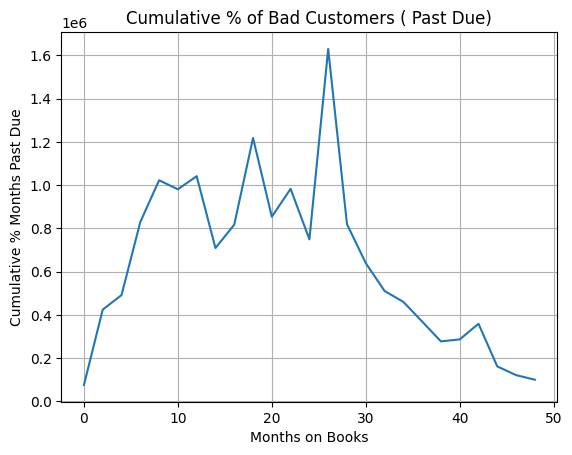

In [119]:
# plot vintage line chart
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
vintage0 = vint_table.replace(0,np.nan)
lst = [i for i in range(0,49,2)]
vint_table[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers ( Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % Months Past Due')

In [128]:
roll_rates = loan_data_defaults.groupby(['origination'])['default_months'].value_counts(normalize=True).unstack()
roll_rates

default_months,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
origination,,,,,,,,,,,,,,,,,,,,,
2013_4,0.000508,0.001523,0.007614,0.009137,0.01269,0.009137,0.01066,0.019289,0.019289,0.013198,...,0.018274,0.011675,0.008629,0.008629,0.01269,0.006599,0.005584,0.004569,0.002538,0.000508


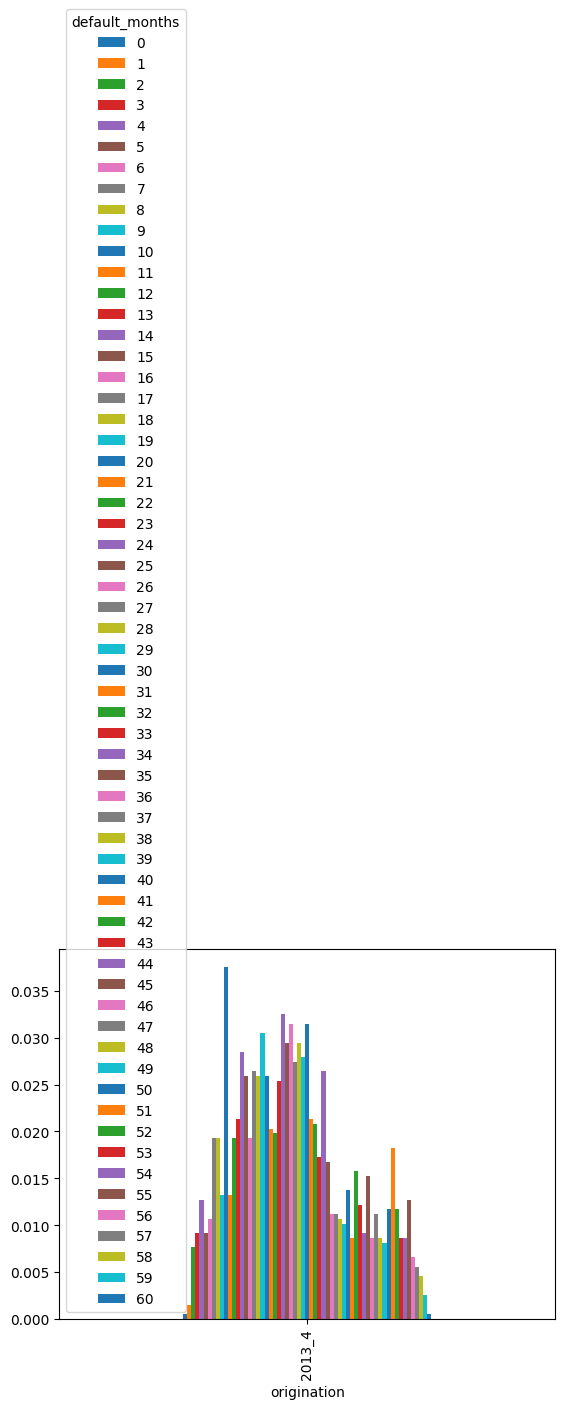

In [129]:
roll_rates.plot(kind='bar');

Text(0, 0.5, 'Cumulative % Months Past Due')

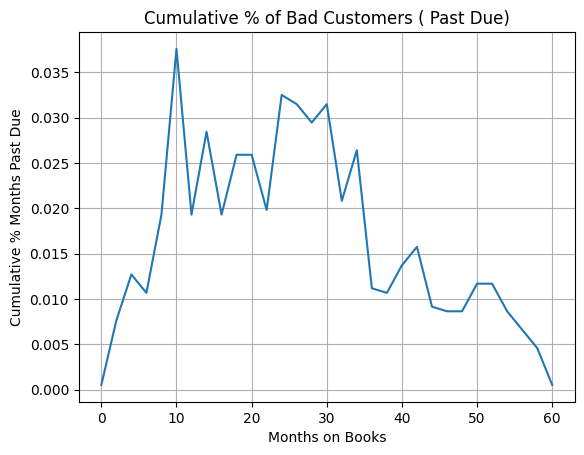

In [121]:
# import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
vintage0 = roll_rates.replace(0,np.nan)
lst = [i for i in range(0,61,2)]
roll_rates[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers ( Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % Months Past Due')

In [125]:
roll_rates = loan_data_defaults.groupby(['origination'])['default_months'].value_counts(normalize=False).unstack()
roll_rates

default_months,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
origination,,,,,,,,,,,,,,,,,,,,,
2013_4,1,3,15,18,25,18,21,38,38,26,...,36,23,17,17,25,13,11,9,5,1


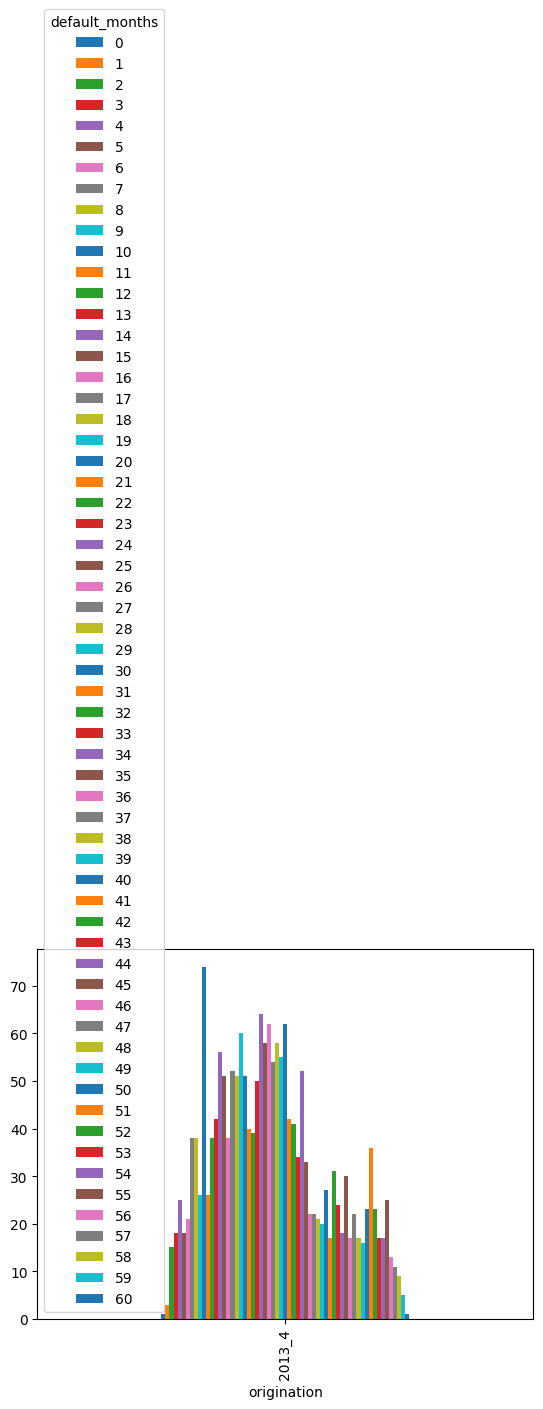

In [127]:
roll_rates.plot(kind='bar');

### The number of customers

Text(0, 0.5, 'Cumulative % Months Past Due')

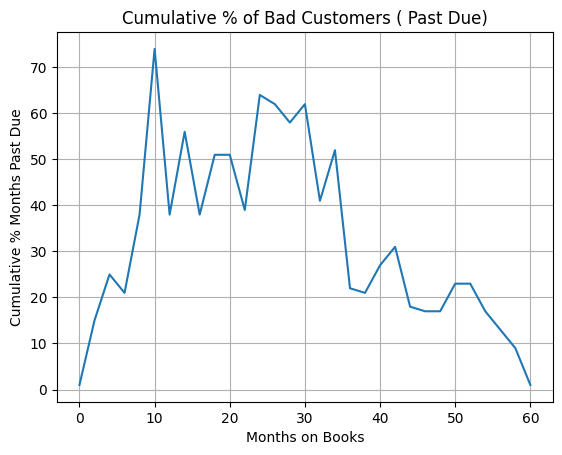

In [123]:
# import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = 'white'
vintage0 = roll_rates.replace(0,np.nan)
lst = [i for i in range(0,61,2)]
roll_rates[lst].T.plot(legend = False, grid = True, title = 'Cumulative % of Bad Customers ( Past Due)')
plt.xlabel('Months on Books')
plt.ylabel('Cumulative % Months Past Due')

## Bank Churn

In [124]:
import pandas as pd

df=pd.read_csv("BankChurners.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
